* PCA to reduce - visualisation
* Extra Tree Regressor
* GridSearch for preprocessing and hyperparameters

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import datetime

from sklearn.metrics import r2_score

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, RobustScaler, Binarizer, StandardScaler, Normalizer, MaxAbsScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

import lightgbm as ltb


In [160]:
df_bike = pd.read_csv("Datas/data_minzhi.csv")

In [161]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,0.483098,0.512252,0.618865,0.224563,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,0.193917,0.189610,0.192450,0.143245,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.326531,0.355856,0.470000,0.122840,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,0.489796,0.525338,0.620000,0.228047,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,0.632653,0.677928,0.770000,0.298225,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


In [162]:
df_train1 = df_bike.loc[(df_bike['year']==2011)]


In [163]:
df_train1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,0.224490,0.305068,0.81,0.000000,16,2011,1,1,0,5
1,1,0,0,1,0.204082,0.288064,0.80,0.000000,40,2011,1,1,1,5
2,1,0,0,1,0.204082,0.288064,0.80,0.000000,32,2011,1,1,2,5
3,1,0,0,1,0.224490,0.305068,0.75,0.000000,13,2011,1,1,3,5
4,1,0,0,1,0.224490,0.305068,0.75,0.000000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4,0,1,2,0.346939,0.372860,0.53,0.193018,251,2011,12,19,19,0
5418,4,0,1,1,0.387755,0.440653,0.40,0.193018,206,2011,12,19,20,0
5419,4,0,1,2,0.346939,0.372860,0.53,0.157870,127,2011,12,19,21,0
5420,4,0,1,2,0.346939,0.372860,0.57,0.193018,107,2011,12,19,22,0


In [164]:
df_train2 = df_bike.loc[(df_bike['year']==2012) & (df_bike['month']<9)]

In [165]:
df_train = pd.concat([df_train1,df_train2])

In [166]:
df_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,0.224490,0.305068,0.81,0.000000,16,2011,1,1,0,5
1,1,0,0,1,0.204082,0.288064,0.80,0.000000,40,2011,1,1,1,5
2,1,0,0,1,0.204082,0.288064,0.80,0.000000,32,2011,1,1,2,5
3,1,0,0,1,0.224490,0.305068,0.75,0.000000,13,2011,1,1,3,5
4,1,0,0,1,0.224490,0.305068,0.75,0.000000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,3,0,0,2,0.632653,0.661036,0.73,0.157870,341,2012,8,19,19,6
9059,3,0,0,2,0.632653,0.661036,0.73,0.228047,274,2012,8,19,20,6
9060,3,0,0,3,0.612245,0.644032,0.78,0.105325,190,2012,8,19,21,6
9061,3,0,0,2,0.612245,0.644032,0.78,0.193018,56,2012,8,19,22,6


In [167]:
df_test = df_bike.loc[(df_bike['year']==2012) & (df_bike['month'] >=9)]

In [168]:
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
9063,3,0,0,1,0.734694,0.745721,0.62,0.122840,168,2012,9,1,0,5
9064,3,0,0,1,0.714286,0.762725,0.74,0.157870,79,2012,9,1,1,5
9065,3,0,0,1,0.693878,0.711825,0.70,0.193018,69,2012,9,1,2,5
9066,3,0,0,1,0.693878,0.711825,0.70,0.122840,35,2012,9,1,3,5
9067,3,0,0,1,0.693878,0.711825,0.70,0.000000,12,2012,9,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,0.367347,0.423649,0.50,0.456213,336,2012,12,19,19,2
10882,4,0,1,1,0.346939,0.372860,0.57,0.263195,241,2012,12,19,20,2
10883,4,0,1,1,0.326531,0.338964,0.61,0.263195,168,2012,12,19,21,2
10884,4,0,1,1,0.326531,0.372860,0.61,0.105325,129,2012,12,19,22,2


In [169]:
y_train = df_train['count']
y_test = df_test['count']

In [170]:
y_test

9063     168
9064      79
9065      69
9066      35
9067      12
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 1823, dtype: int64

In [171]:
X_train = df_train.drop(columns='count')
X_test = df_test.drop(columns='count')

In [172]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
9063,3,0,0,1,0.734694,0.745721,0.62,0.122840,2012,9,1,0,5
9064,3,0,0,1,0.714286,0.762725,0.74,0.157870,2012,9,1,1,5
9065,3,0,0,1,0.693878,0.711825,0.70,0.193018,2012,9,1,2,5
9066,3,0,0,1,0.693878,0.711825,0.70,0.122840,2012,9,1,3,5
9067,3,0,0,1,0.693878,0.711825,0.70,0.000000,2012,9,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,0.367347,0.423649,0.50,0.456213,2012,12,19,19,2
10882,4,0,1,1,0.346939,0.372860,0.57,0.263195,2012,12,19,20,2
10883,4,0,1,1,0.326531,0.338964,0.61,0.263195,2012,12,19,21,2
10884,4,0,1,1,0.326531,0.372860,0.61,0.105325,2012,12,19,22,2


In [173]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

2022/03/24 08:57:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '344b0b301b0741919b98fc4903e8b85d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/03/24 08:57:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers Wi

0.885850493903035

# Gridsearch and Gridsearch with ML flow pipeline




In [174]:

# pipe = Pipeline([
# ('scaler', StandardScaler()),
# ('feature', None),
# ('regressor', ExtraTreesRegressor())
# ])

# # Add parameter
# parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
# 	Normalizer(), MaxAbsScaler(),
# 	RobustScaler()],
# 	'feature': [None, PolynomialFeatures()],
# 	'regressor': [ExtraTreesRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]
# }

# # Obtain score for linear regression using pipe 

# print('=================================================')
# print('Result for ExtraTreesRegressor using StandardScaler')
# print('=================================================')
# pipe.fit(X_train, y_train)
# print('Training set score: ' + str(pipe.score(X_train,y_train)))
# print('Test set score: ' + str(pipe.score(X_test,y_test)))
# print('=================================================')
# print('Result using gridsearch with different scaling and normalisation processes')
# print('=================================================')
# grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train, y_train)
 
# print('GS: Training set score: ' + str(grid.score(X_train, y_train)))
# print('GS: Test set score: ' + str(grid.score(X_test, y_test)))

# print('=================================================')
# print('Best parameters used')
# print('=================================================')
# # Access the best set of parameters
# best_params = grid.best_params_
# print(best_params)
# # Stores the optimum model in best_pipe
# best_pipe = grid.best_estimator_
# print(best_pipe)




In [175]:

pipe = Pipeline([
('scaler', MinMaxScaler()),
('regressor', ExtraTreesRegressor())
])

print('=================================================')
print('Result for ExtraTreesRegressor using MinMaxScaler')
print('=================================================')
pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

2022/03/24 08:57:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7885ebf58a4f46f78c50bf3cd2807161', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Result for ExtraTreesRegressor using MinMaxScaler


2022/03/24 08:58:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Training set score: 0.9999999990544288
Test set score: 0.8896564385477503


In [176]:
# On met en place Mlflow pour suivre les performances de nos modèles
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

# On crée une nouvelle expérimentation qui permet de rassembler tous les entrainements pour un meme projet.
# experiment_id = mlflow.create_experiment("bike_sharing_regression")

In [177]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred)
    recall = recall_score(actual, pred)
    precision = precision_score(actual, pred)
    auc = roc_auc_score(actual, pred)
    return accuracy, f1, recall, precision, auc

In [178]:

# # On utilise la fonction autolog qui permet de tracker tous les paramètres des modèles
# mlflow.sklearn.autolog()

# with mlflow.start_run(experiment_id = 1):

#     param_grid = {
#         "extratreesregressor__n_estimators": np.arange(50,200,10),
#         "extratreesregressor__criterion": ['mae', 'mse'],
#         "extratreesregressor__max_features": ['auto', 'sqrt', 'log2'],
#         }

#     model_e_tree = make_pipeline(MinMaxScaler(), ExtraTreesRegressor())
#     model_e_tree.fit(X_train, y_train)

#     clf = GridSearchCV(model_e_tree, param_grid)
#     clf.fit(X_train,y_train)
#     y_pred_e_tree = clf.predict(X_test)

#     print('GS: Training set score: ' + str(clf.score(X_train, y_train)))
#     print('GS: Test set score: ' + str(clf.score(X_test, y_test)))

#     print('=================================================')
#     print('Best parameters used')
#     print('=================================================')
#     # Access the best set of parameters
#     best_param_polys = clf.best_params_
#     print(best_param_polys)
#     # Stores the optimum model in best_pipe
#     best_pipe_polys = clf.best_estimator_
#     print(best_pipe_polys)
           

#     tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

#     if tracking_url_type_store != "file":
#         mlflow.sklearn.log_model(ExtraTreesRegressor, "model", registered_model_name="ExtraTreesRegressor")
#     else:
#         mlflow.sklearn.log_model(ExtraTreesRegressor, "model") 


In [179]:
# clf.score(X_test, y_test)

# Plot y and y_pred and diff

In [220]:
cols = [x for x in X_test.columns if x!='count']
cols

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'dayofweek']

In [180]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('regressor', ExtraTreesRegressor())
])

print('=================================================')
print('Result for ExtraTreesRegressor using StandardScaler')
print('=================================================')
pipe.fit(X_train, y_train)
y_pred_e_trees = pipe.predict(X_test)
trainscore_e_trees = pipe.score(X_train,y_train)
testscore_e_trees = pipe.score(X_test,y_test)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

result = pd.DataFrame(data=[y_test,y_pred_e_trees] , columns=['y_test','y_pred_e_trees'])

2022/03/24 08:58:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '337347119af14cbcbe2158572a03e6a8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Result for ExtraTreesRegressor using StandardScaler


2022/03/24 08:58:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Training set score: 0.9999999967868793
Test set score: 0.8793133865087838


2022/03/24 15:39:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '85aa825c75194709aa9df1e2be6ad86f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/03/24 15:39:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers Wi

<BarContainer object of 13 artists>

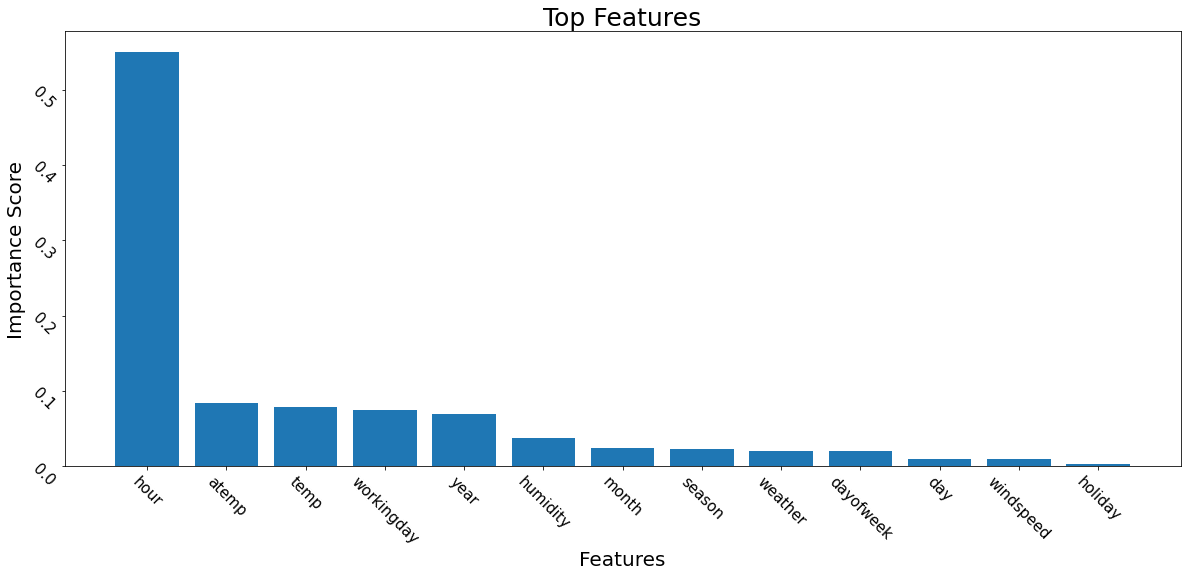

In [219]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plt.title("Top Features", fontsize=25)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Importance Score", fontsize=20)
plt.xticks(rotation=-45, fontsize=15)
plt.yticks(rotation=-45, fontsize=15)
feat_importances = pd.Series(model.feature_importances_, index= cols)
feat_importances = feat_importances.sort_values(ascending=False)
plt.bar(feat_importances.index, feat_importances)

In [181]:
tmp = {'y_test': y_test, 'y_pred_e_trees':y_pred_e_trees}
result = pd.DataFrame(data=tmp , columns=['y_test','y_pred_e_trees'])
result['diff_e_trees'] = result['y_test'] - result['y_pred_e_trees'] 
result

,y_test,y_pred_e_trees,diff_e_trees
9063,168,160.77,7.23
9064,79,108.96,-29.96
9065,69,84.04,-15.04
9066,35,33.81,1.19
9067,12,8.72,3.28
...,...,...,...
10881,336,371.20,-35.20
10882,241,252.37,-11.37
10883,168,200.17,-32.17
10884,129,164.01,-35.01


In [182]:
df_test['day']

9063      1
9064      1
9065      1
9066      1
9067      1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 1823, dtype: int64

In [183]:
result['month_data'] = df_test['year'].map(str)+ '-' +df_test['month'].map(str)
result['month_data'] = pd.to_datetime(result['month_data'], format='%Y-%m').dt.strftime('%Y-%m')
result['day_data'] = df_test['day'].map(str)
result['hour_data'] = df_test['hour'].map(str)
result

,y_test,y_pred_e_trees,diff_e_trees,month_data,day_data,hour_data
9063,168,160.77,7.23,2012-09,1,0
9064,79,108.96,-29.96,2012-09,1,1
9065,69,84.04,-15.04,2012-09,1,2
9066,35,33.81,1.19,2012-09,1,3
9067,12,8.72,3.28,2012-09,1,4
...,...,...,...,...,...,...
10881,336,371.20,-35.20,2012-12,19,19
10882,241,252.37,-11.37,2012-12,19,20
10883,168,200.17,-32.17,2012-12,19,21
10884,129,164.01,-35.01,2012-12,19,22


In [184]:
result['diff_e_trees']

9063      7.23
9064    -29.96
9065    -15.04
9066      1.19
9067      3.28
         ...  
10881   -35.20
10882   -11.37
10883   -32.17
10884   -35.01
10885    -6.25
Name: diff_e_trees, Length: 1823, dtype: float64

In [185]:
x_axis = list(range(0, len(result)))
len(x_axis)

1823

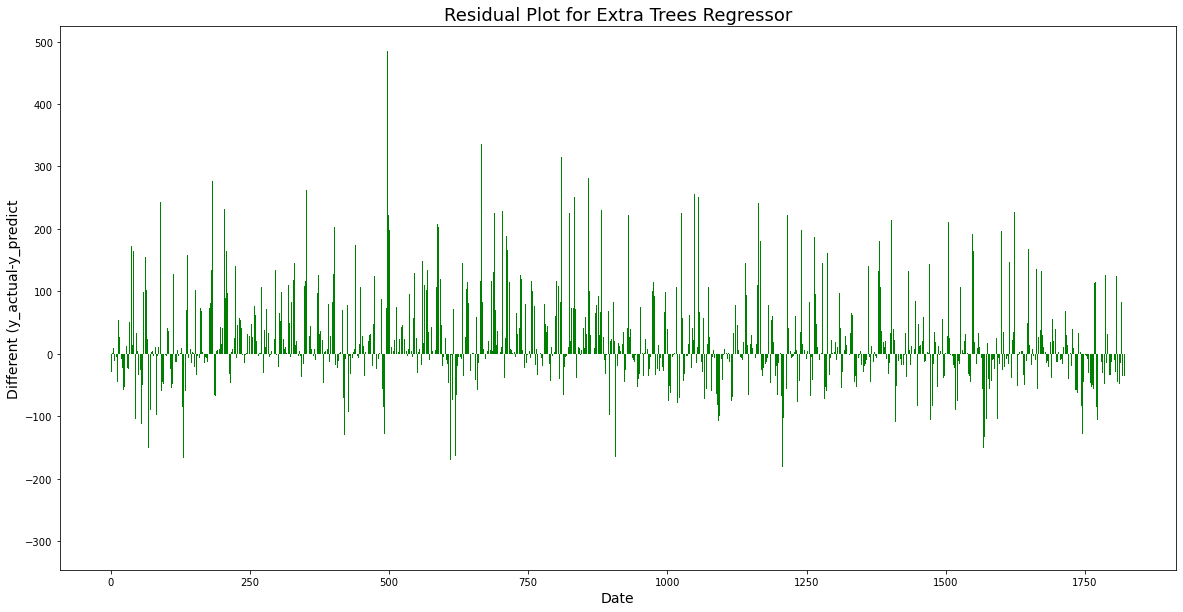

In [186]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Residual Plot for Extra Trees Regressor',fontsize=18)
x_axis = list(range(0, len(result)))
ax.bar(x_axis, result['diff_e_trees'],color='green')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Different (y_actual-y_predict',fontsize=14)

# ax2=ax.twinx()
# ax2.plot(df_group_month_sum['date_data'], df_group_month_sum['atemp'],color='blue',marker="o")
# ax2.set_ylabel('Feels like temperature')
plt.show()

# Code for Light BGM and XGboost
# Combine to see results

In [187]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('regressor', GradientBoostingRegressor())
])

print('=================================================')
print('Result for GradientBoostingRegressor using MinMaxScaler')
print('=================================================')
pipe.fit(X_train, y_train)
y_pred_xgboost = pipe.predict(X_test)
trainscore_xgboost = pipe.score(X_train,y_train)
testscore_xgboost = pipe.score(X_test,y_test)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))


2022/03/24 08:58:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd028aff432ad49d3a27643dd750529f5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Result for GradientBoostingRegressor using MinMaxScaler


2022/03/24 08:58:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Training set score: 0.8584938148155974
Test set score: 0.7557434765083513


2022/03/24 15:38:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd1a7c3c43f2c489d9e4a65fb89e2a579', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/03/24 15:38:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers Wi

<BarContainer object of 13 artists>

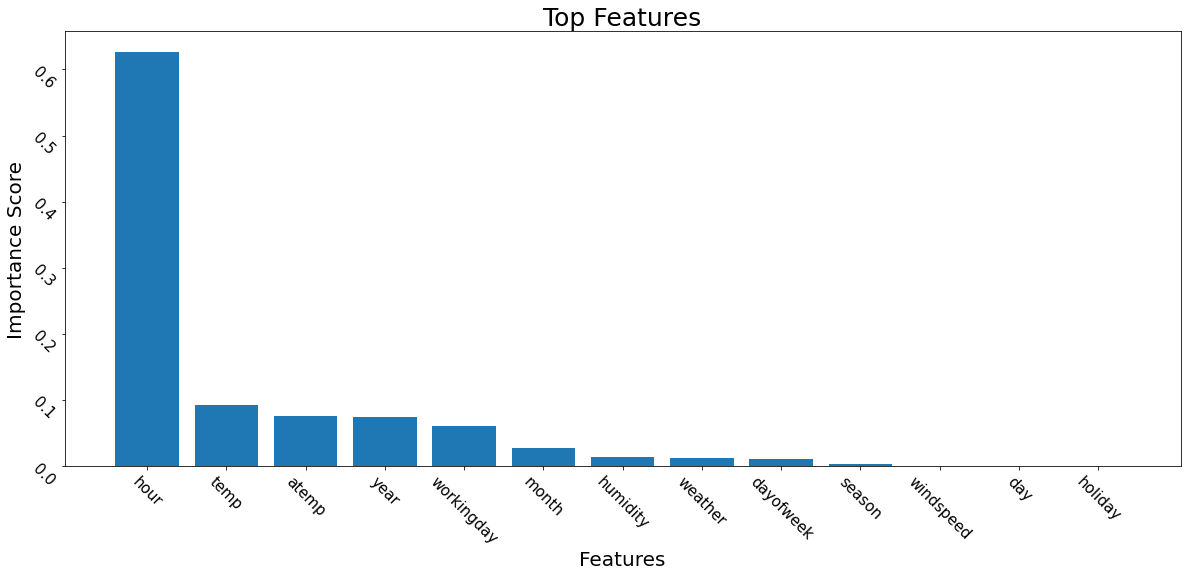

In [218]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plt.title("Top Features", fontsize=25)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Importance Score", fontsize=20)
plt.xticks(rotation=-45, fontsize=15)
plt.yticks(rotation=-45, fontsize=15)
feat_importances = pd.Series(model.feature_importances_, index= cols)
feat_importances = feat_importances.sort_values(ascending=False)
plt.bar(feat_importances.index, feat_importances)

In [188]:
result['y_pred_xgboost'] = y_pred_xgboost
result['diff_xgboost'] = result['y_test'] - result['y_pred_xgboost'] 
result

,y_test,y_pred_e_trees,diff_e_trees,month_data,day_data,hour_data,y_pred_xgboost,diff_xgboost
9063,168,160.77,7.23,2012-09,1,0,93.959531,74.040469
9064,79,108.96,-29.96,2012-09,1,1,78.626554,0.373446
9065,69,84.04,-15.04,2012-09,1,2,71.743408,-2.743408
9066,35,33.81,1.19,2012-09,1,3,68.601330,-33.601330
9067,12,8.72,3.28,2012-09,1,4,68.601330,-56.601330
...,...,...,...,...,...,...,...,...
10881,336,371.20,-35.20,2012-12,19,19,362.956324,-26.956324
10882,241,252.37,-11.37,2012-12,19,20,229.896930,11.103070
10883,168,200.17,-32.17,2012-12,19,21,178.042623,-10.042623
10884,129,164.01,-35.01,2012-12,19,22,128.538665,0.461335


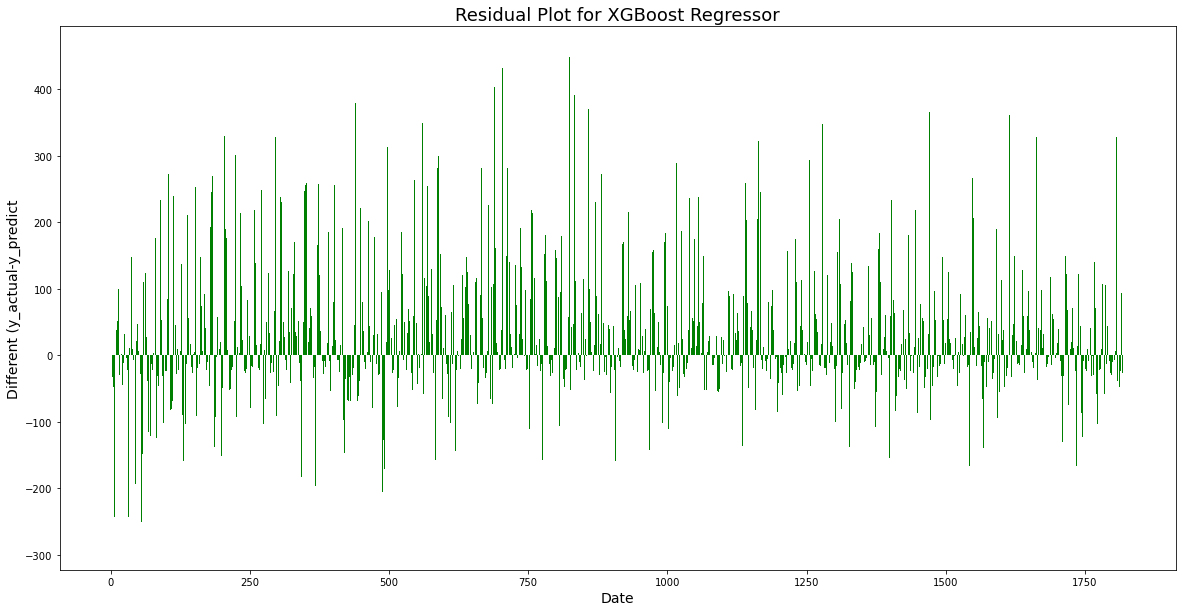

In [189]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Residual Plot for XGBoost Regressor',fontsize=18)
x_axis = list(range(0, len(result)))
ax.bar(x_axis, result['diff_xgboost'],color='green')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Different (y_actual-y_predict',fontsize=14)

# ax2=ax.twinx()
# ax2.plot(df_group_month_sum['date_data'], df_group_month_sum['atemp'],color='blue',marker="o")
# ax2.set_ylabel('Feels like temperature')
plt.show()

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'dayofweek']

In [214]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('regressor', ltb.LGBMRegressor())
])

print('=================================================')
print('Result for LGBMRegressor using MinMaxScaler')
print('=================================================')
pipe.fit(X_train, y_train)
y_pred_ltb = pipe.predict(X_test)
trainscore_ltb = pipe.score(X_train,y_train)
testscore_ltb = pipe.score(X_test,y_test)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))




2022/03/24 15:36:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f7c684254eaa48eb887d280cff340272', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Result for LGBMRegressor using MinMaxScaler


2022/03/24 15:36:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Apprenant\anaconda3\envs\myenv_04\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Training set score: 0.9693928557279845
Test set score: 0.9014656556601273


<BarContainer object of 13 artists>

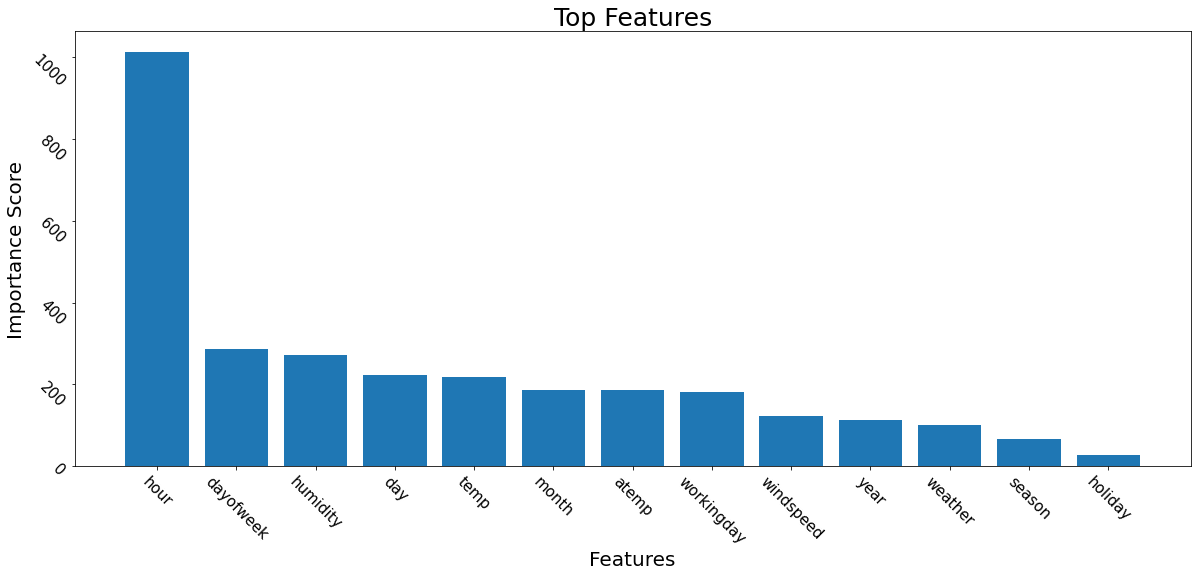

In [216]:

model = ltb.LGBMRegressor()
model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plt.title("Top Features", fontsize=25)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Importance Score", fontsize=20)
plt.xticks(rotation=-45, fontsize=15)
plt.yticks(rotation=-45, fontsize=15)
feat_importances = pd.Series(model.feature_importances_, index= cols)
feat_importances = feat_importances.sort_values(ascending=False)
plt.bar(feat_importances.index, feat_importances)


In [191]:
result['y_pred_ltb'] = y_pred_ltb
result['diff_ltb'] = result['y_test'] - result['y_pred_ltb'] 
result

,y_test,y_pred_e_trees,diff_e_trees,month_data,day_data,hour_data,y_pred_xgboost,diff_xgboost,y_pred_ltb,diff_ltb
9063,168,160.77,7.23,2012-09,1,0,93.959531,74.040469,145.616049,22.383951
9064,79,108.96,-29.96,2012-09,1,1,78.626554,0.373446,100.582603,-21.582603
9065,69,84.04,-15.04,2012-09,1,2,71.743408,-2.743408,66.826696,2.173304
9066,35,33.81,1.19,2012-09,1,3,68.601330,-33.601330,29.038175,5.961825
9067,12,8.72,3.28,2012-09,1,4,68.601330,-56.601330,18.730805,-6.730805
...,...,...,...,...,...,...,...,...,...,...
10881,336,371.20,-35.20,2012-12,19,19,362.956324,-26.956324,356.927115,-20.927115
10882,241,252.37,-11.37,2012-12,19,20,229.896930,11.103070,251.833515,-10.833515
10883,168,200.17,-32.17,2012-12,19,21,178.042623,-10.042623,180.304147,-12.304147
10884,129,164.01,-35.01,2012-12,19,22,128.538665,0.461335,145.578631,-16.578631


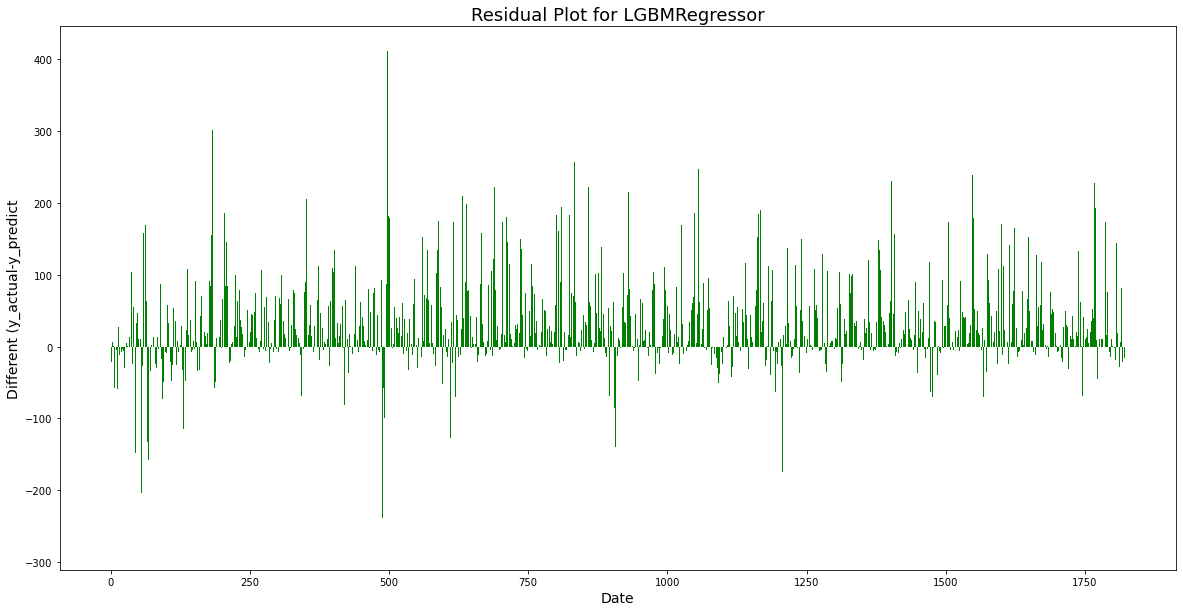

In [192]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
plt.title('Residual Plot for LGBMRegressor',fontsize=18)
x_axis = list(range(0, len(result)))
ax.bar(x_axis, result['diff_ltb'],color='green')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Different (y_actual-y_predict',fontsize=14)

# ax2=ax.twinx()
# ax2.plot(df_group_month_sum['date_data'], df_group_month_sum['atemp'],color='blue',marker="o")
# ax2.set_ylabel('Feels like temperature')
plt.show()

## Combination : 

In [199]:
result

,y_test,y_pred_e_trees,diff_e_trees,month_data,day_data,hour_data,y_pred_xgboost,diff_xgboost,y_pred_ltb,diff_ltb
9063,168,160.77,7.23,2012-09,1,0,93.959531,74.040469,145.616049,22.383951
9064,79,108.96,-29.96,2012-09,1,1,78.626554,0.373446,100.582603,-21.582603
9065,69,84.04,-15.04,2012-09,1,2,71.743408,-2.743408,66.826696,2.173304
9066,35,33.81,1.19,2012-09,1,3,68.601330,-33.601330,29.038175,5.961825
9067,12,8.72,3.28,2012-09,1,4,68.601330,-56.601330,18.730805,-6.730805
...,...,...,...,...,...,...,...,...,...,...
10881,336,371.20,-35.20,2012-12,19,19,362.956324,-26.956324,356.927115,-20.927115
10882,241,252.37,-11.37,2012-12,19,20,229.896930,11.103070,251.833515,-10.833515
10883,168,200.17,-32.17,2012-12,19,21,178.042623,-10.042623,180.304147,-12.304147
10884,129,164.01,-35.01,2012-12,19,22,128.538665,0.461335,145.578631,-16.578631


In [210]:
# pipe1 = Pipeline([
# ('scaler', MinMaxScaler()),
# ('regressor', ExtraTreesRegressor())
# ])
# pipe2 = Pipeline([
# ('scaler', MinMaxScaler()),
# ('regressor', GradientBoostingRegressor())
# ])
# pipe3 = Pipeline([
# ('scaler', MinMaxScaler()),
# ('regressor', ltb.LGBMRegressor())
# ])

# print('=================================================')
# print('Result for Combination using MinMaxScaler')
# print('=================================================')


# pipe1.fit(X_train, y_train)
# pipe2.fit(X_train, y_train)
# pipe3.fit(X_train, y_train)
result['real_score_combi'] = round((result['y_pred_e_trees']+result['y_pred_xgboost']+result['y_pred_ltb'])/3)
result['real_score_combi2'] = round((result['y_pred_e_trees']+result['y_pred_xgboost'])/2)
result['real_score_combi3'] = round((result['y_pred_e_trees']+result['y_pred_ltb'])/2)

score_combi = r2_score(result['y_test'],result['real_score_combi'])
score_combi2 = r2_score(result['y_test'],result['real_score_combi2'])
score_combi3 = r2_score(result['y_test'],result['real_score_combi3'])

# y_pred_ltb = pipe.predict(X_test)
# trainscore_ltb = pipe.score(X_train,y_train)
# testscore_ltb = pipe.score(X_test,y_test)
# print('Training set score: ' + str(pipe.score(X_train,y_train)))
# print('Test set score: ' + str(pipe.score(X_test,y_test)))
score_combi

0.8698742406093115

In [208]:
score_combi2

0.8395026732628532

In [211]:
score_combi3

0.8985038359425062